## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generalizd Neural Network Class

In [2]:
class NeuralNetwork:
    
    def __init__(self, input_size, hidden_layer_neurons, output_size):
        np.random.seed(2)
        
        self.number_of_layers = len(hidden_layer_neurons) + 2                           # hidden + input + output
        self.input_size = input_size
        self.hidden_layers_neurons = hidden_layer_neurons                               # neurons per hidden layer
        self.output_size = output_size
        self.layers = [input_size] + hidden_layer_neurons + [output_size]
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) for i in range(self.number_of_layers - 1)]
        self.biases = [np.zeros((1, layer)) for layer in self.layers[1:]]
        self.loss_list = []
        self.activations = None
        self.activation_funct = None
        
        
    def __tanh__(self, z):
        return np.tanh(z)

    
    def __tanh_deriv__(self, z):
        return 1.0 - np.tanh(z)**2

    
    def __sigmoid__(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    def __sigmoid_deriv__(self, z):
        return np.exp(-z) / (np.power(1 + np.exp(-z), 2))
        
        
    def __compute_loss__(self, X, y):
        final_loss = 0
        
        for x_element, y_element in zip(X, y):
            x_element = x_element.reshape(self.input_size, 1)
            y_element = y_element.reshape(self.output_size, 1)
            output_forward = self.__forward__(x_element)
            
            loss = 0.5 * np.sum(( y_element - output_forward) ** 2)
            final_loss += loss
            
        self.loss_list.append(final_loss)
            
    
    def __forward__(self, X):
        self.activations = [X]
        
        for weight, bias in zip(self.weights, self.biases):
            z = np.matmul(weight.T, self.activations[-1]) + bias.T
            
            if self.activation_funct == 'sigmoid':
                a = self.__sigmoid__(z)
            else:
                a = self.__tanh__(z)
                
            self.activations.append(a)
            
        return self.activations[-1]
    
    
    def __backward__(self, y):
        deltas = [None] * len(self.weights)                 
        delta =  y - self.activations[-1]
        
        if self.activation_funct == 'sigmoid':
            deltas[-1] = delta * self.__sigmoid_deriv__(self.activations[-1])
        elif self.activation_funct == 'tanh':
            deltas[-1] = delta * self.__tanh_deriv__(self.activations[-1])

        for i in reversed(range(len(deltas) - 1)):
            error = np.matmul(self.weights[i+1], deltas[i+1])   
            
            if self.activation_funct == 'sigmoid':
                deltas[i] = error * self.__sigmoid_deriv__(self.activations[i+1])  
            elif self.activation_funct == 'tanh':
                deltas[i] = error * self.__tanh_deriv__(self.activations[i+1])


        for i in range(len(self.weights)):
            self.weights[i] += np.matmul(self.activations[i], deltas[i].T) * learning_rate 
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * learning_rate

        
    def train(self, X, y, learning_rate, epochs, active='sigmoid'):
        self.activation_funct = active
        
        for epoch in range(epochs):
            for x_element, y_element in zip(X, y):
                x_element = x_element.reshape(self.input_size, 1)
                y_element = y_element.reshape(self.output_size, 1)
                self.__forward__(x_element)
                self.__backward__(y_element)
            self.__compute_loss__(X, y)
            
        return self.loss_list, self.weights, self.biases
            
    
    def test_model(self, X):
        output = self.__forward__(X)
        output = np.round(output, 4).reshape(self.output_size).tolist()
        
        return output
                
    
    def describe_model(self):
        """ for testing purpose """
        
        print("Number of Layers: ", self.number_of_layers)
        print("Input Size: ", self.input_size)
        print("Output Size: ", self.output_size)
        print("Weights Shape: \n")
        for w in self.weights:
            print(w.shape)
        print("Biases Shape: \n")
        for b in self.biases:
            print(b.shape)

## Part B - Problem 1 

In [99]:
np.random.seed(7)

input_size = 2
hidden_layer_neurons = []                            # single layer nn 
output_size = 2
learning_rate = 0.5
epochs = 100

X = np.array([[0.1, 1.2], [0.7, 1.8], [0.8, 1.6], [0.8, 0.6], [1.0, 0.8], [0.3, 0.5], \
              [0.0, 0.2], [-0.3, 0.8], [-0.5, -1.5], [-1.5, -1.3]])
y = np.array([[1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 1], [0, 1]])

model = NeuralNetwork(input_size, hidden_layer_neurons, output_size)
loss, weights, biases = model.train(X, y, learning_rate, epochs, 'sigmoid')

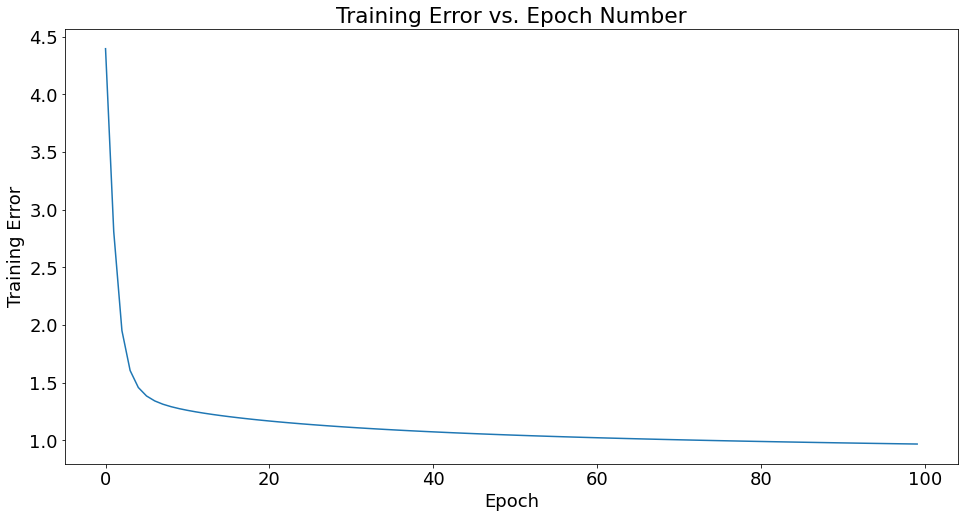

In [100]:
# Plot training error vs. epoch number
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 8))
plt.plot(range(epochs), loss)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')
plt.savefig(f'./Images/PartB_Problem_1_1.pdf', bbox_inches="tight", dpi=300)
plt.show()

In [101]:
op = []

for x_ele in X:
    x_ele = x_ele.reshape(input_size, 1)
    output = model.test_model(x_ele)
    op.append(output)

for act, pred in zip(y, op):
    print(f"Actual: {act} || Prediction: {pred}")

Actual: [1 0] || Prediction: [0.9885, 0.3329]
Actual: [1 0] || Prediction: [0.9932, 0.05]
Actual: [1 0] || Prediction: [0.9814, 0.0412]
Actual: [0 0] || Prediction: [0.5691, 0.0706]
Actual: [0 0] || Prediction: [0.6119, 0.0346]
Actual: [1 1] || Prediction: [0.7876, 0.2826]
Actual: [1 1] || Prediction: [0.7398, 0.5482]
Actual: [1 1] || Prediction: [0.9837, 0.691]
Actual: [0 1] || Prediction: [0.0214, 0.94]
Actual: [0 1] || Prediction: [0.4296, 0.997]


## Decision Boundary

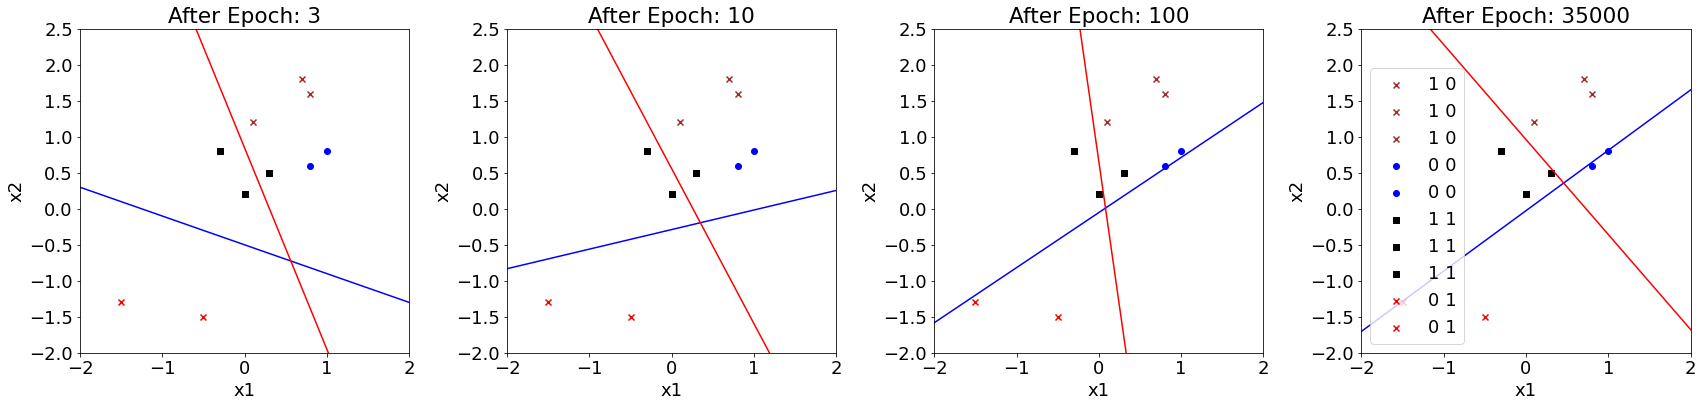

In [102]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
axes[0].set_xlim(-2, 2)
axes[1].set_xlim(-2, 2)
axes[2].set_xlim(-2, 2)
axes[3].set_xlim(-2, 2)

axes[0].set_ylim(-2, 2.5)
axes[1].set_ylim(-2, 2.5)
axes[2].set_ylim(-2, 2.5)
axes[3].set_ylim(-2, 2.5)

for index, epoch in enumerate([3, 10, 100, 35000]):
    
    np.random.seed(7)

    input_size = 2
    hidden_layer_neurons = []                            # single layer nn 
    output_size = 2
    learning_rate = 0.99
    
    X = np.array([[0.1, 1.2], [0.7, 1.8], [0.8, 1.6], [0.8, 0.6], [1.0, 0.8], [0.3, 0.5], \
              [0.0, 0.2], [-0.3, 0.8], [-0.5, -1.5], [-1.5, -1.3]])
    y = np.array([[1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 1], [0, 1]])

    model = NeuralNetwork(input_size, hidden_layer_neurons, output_size)
    loss, weights, biases = model.train(X, y, learning_rate, epoch, 'sigmoid')
    
    weight = weights[0]
    bias = biases[0][0]

    # for line 1 
    slope = -weight[1][0] / weight[0][0]
    intercept = -bias[0] / weight[0][0]

    x2 = np.arange(-3, 3, 0.1)
    x1 = slope * x2 + intercept 

    axes[index].plot(x1, x2, 'blue')

    # for line 2 
    slope = -weight[1][1] / weight[0][1]
    intercept = -bias[1] / weight[0][1]

    x2 = np.arange(-3, 3, 0.1)
    x1 = slope * x2 + intercept

    axes[index].plot(x1, x2, 'red')
    
    axes[index].set_title(f'After Epoch: {epoch}')
    axes[index].set_xlabel('x1')
    axes[index].set_ylabel('x2')

    X = np.array([[0.1, 1.2], [0.7, 1.8], [0.8, 1.6], [0.8, 0.6], [1.0, 0.8], [0.3, 0.5], \
                  [0.0, 0.2], [-0.3, 0.8], [-0.5, -1.5], [-1.5, -1.3]])
    y = np.array([[1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 1], [0, 1]])

    for i in range(y.shape[0]):
        if y[i, 0] == 1 and y[i, 1] == 0:
            axes[index].scatter(X[i, 0], X[i, 1], c='brown', marker='x', label='1 0')
        elif y[i, 0] == 0 and y[i, 1] == 0:
            axes[index].scatter(X[i, 0], X[i, 1], c='blue', marker='o', label='0 0')
        elif y[i, 0] == 1 and y[i, 1] == 1:
            axes[index].scatter(X[i, 0], X[i, 1], c='black', marker='s', label='1 1')
        else:
            axes[index].scatter(X[i, 0], X[i, 1], c='red', marker='x', label='0 1')
            
plt.legend()
plt.tight_layout()
plt.savefig(f'./Images/PartB_Problem_1_2.pdf', bbox_inches="tight", dpi=300)
plt.show()

## Part B - Problem 2

In [110]:
np.random.seed(7)

input_size = 1
hidden_layer_neurons = [21]                            # two-layered nn 
output_size = 1
learning_rate = 0.01
epochs = 5000

X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, \
     0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, \
     -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

model = NeuralNetwork(input_size, hidden_layer_neurons, output_size)
loss, weights, biases = model.train(X, y, learning_rate, epochs, 'tanh')

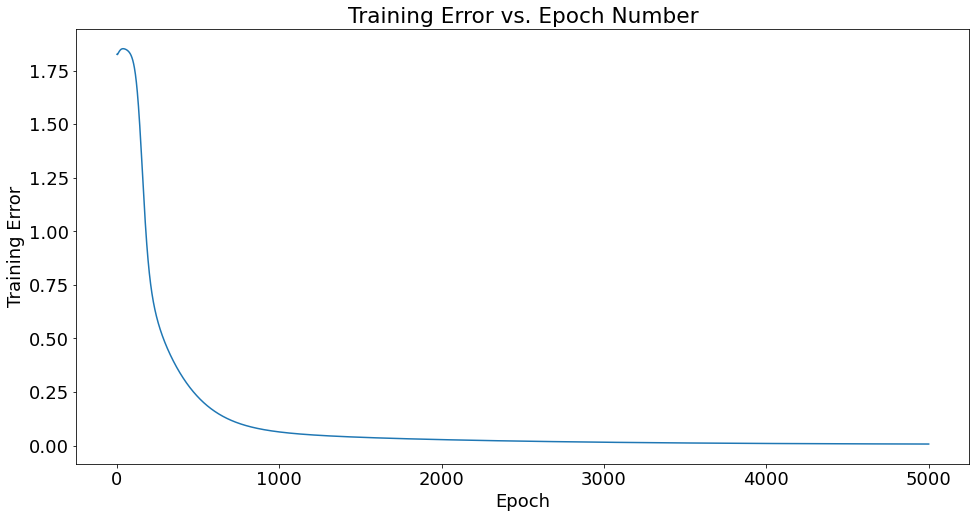

In [111]:
# Plot training error vs. epoch number
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 8))
plt.plot(range(epochs), loss)
plt.xlabel('Epoch')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epoch Number')
plt.savefig(f'./Images/PartB_Problem_2_1_error.pdf', bbox_inches="tight", dpi=300)
plt.show()

In [112]:
op = []

for x_ele in X:
    x_ele = x_ele.reshape(input_size, 1)
    output = model.test_model(x_ele)
    op.append(output)

for act, pred in zip(y, op):
    print(f"Actual: {act} Prediction: {pred}\n\n")

Actual: -0.96 Prediction: [-0.8888]


Actual: -0.577 Prediction: [-0.6165]


Actual: -0.073 Prediction: [-0.0807]


Actual: 0.377 Prediction: [0.4007]


Actual: 0.641 Prediction: [0.6144]


Actual: 0.66 Prediction: [0.6288]


Actual: 0.461 Prediction: [0.4719]


Actual: 0.134 Prediction: [0.1449]


Actual: -0.201 Prediction: [-0.2057]


Actual: -0.434 Prediction: [-0.4146]


Actual: -0.5 Prediction: [-0.4713]


Actual: -0.393 Prediction: [-0.3984]


Actual: -0.165 Prediction: [-0.1942]


Actual: 0.099 Prediction: [0.0896]


Actual: 0.307 Prediction: [0.308]


Actual: 0.396 Prediction: [0.3837]


Actual: 0.345 Prediction: [0.3349]


Actual: 0.182 Prediction: [0.1951]


Actual: -0.031 Prediction: [0.0031]


Actual: -0.219 Prediction: [-0.1954]


Actual: -0.321 Prediction: [-0.3643]




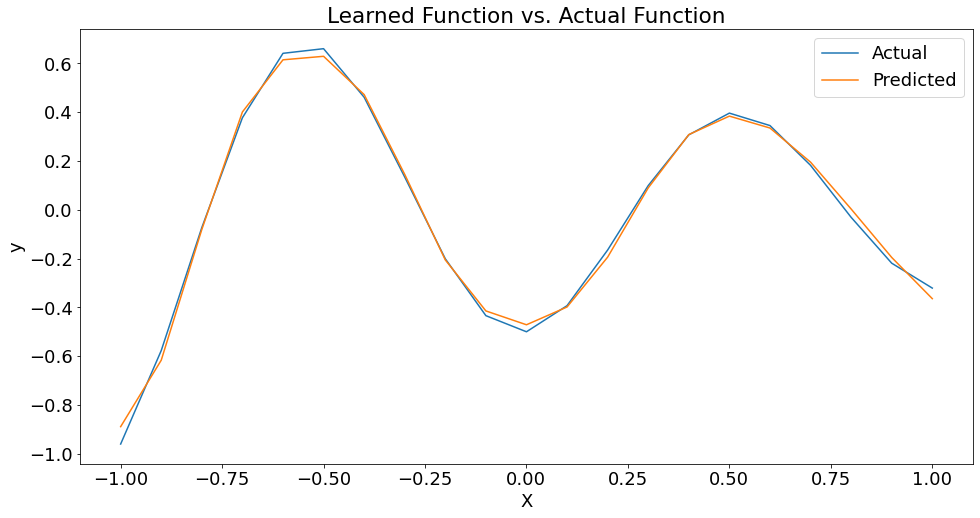

In [113]:
# Plot training error vs. epoch number
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16, 8))
plt.plot(X.reshape(21, 1), y.reshape(21, 1), label='Actual')
plt.plot(X.reshape(21, 1), np.array(op).reshape(21, 1), label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Learned Function vs. Actual Function')
plt.legend()
plt.savefig(f'./Images/PartB_Problem_2_1_actual_predicted.pdf', bbox_inches="tight", dpi=300)
plt.show()